In [1]:
import os
import sys
import pandas as pd
import seaborn as sns


from sklearn.svm import SVR
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score,accuracy_score, ConfusionMatrixDisplay, classification_report

In [2]:
# Comprueba si el código se está ejecutando en Google Colab
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

path_absolute = ''
if IN_COLAB:
    print("El código se está ejecutando en Google Colab.")
    from google.colab import drive

    drive.mount('/content/drive')
    path_absolute = '/content/drive/Othercomputers/Mi_portátil/TFM/WorkSpace/TFM/'

    # Cambia al directorio de tu carpeta en Google Drive
    os.chdir(path_absolute)

    # Lista los archivos y carpetas en el directorio actual
    contenido_carpeta = os.listdir(path_absolute)
    print("Contenido de la carpeta en Google Drive:")
    print(contenido_carpeta)
else:
    print("El código se está ejecutando en un entorno local.")
    path_absolute = 'C:/Users/jaime/OneDrive - Universidad de Málaga/Escritorio/UNIR/TFM/WorkSpace/TFM/'

path_file = 'df_movies_rating.csv'

El código se está ejecutando en un entorno local.


In [3]:
dataFrame = pd.read_csv(path_absolute+path_file, sep=',')
data = dataFrame.copy()

In [4]:
# Especifica el tamaño de la muestra que deseas obtener
tamano_muestra = 1000  # Cambia esto al tamaño de muestra que desees
# Obtiene una muestra aleatoria uniforme del DataFrame
muestra_aleatoria = data.sample(n=tamano_muestra, random_state=42)  # random_state para reproducibilidad

In [5]:
data.head()

,userId,movieId,timestamp_scr,tag,timestamp_tags,title,(no genres listed),Action,Adventure,Animation,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating
0,3,260,1439472239,classic,1439472355,Star Wars: Episode IV - A New Hope (1977),0,1,1,0,...,0,0,0,0,0,1,0,0,0,4.0
1,3,260,1439472239,sci-fi,1439472256,Star Wars: Episode IV - A New Hope (1977),0,1,1,0,...,0,0,0,0,0,1,0,0,0,4.0
2,264,260,1543390081,aliens,1543390134,Star Wars: Episode IV - A New Hope (1977),0,1,1,0,...,0,0,0,0,0,1,0,0,0,3.0
3,264,260,1543390081,oldie but goodie,1543390130,Star Wars: Episode IV - A New Hope (1977),0,1,1,0,...,0,0,0,0,0,1,0,0,0,3.0
4,264,260,1543390081,scifi cult,1543390105,Star Wars: Episode IV - A New Hope (1977),0,1,1,0,...,0,0,0,0,0,1,0,0,0,3.0


In [6]:
data.shape

(834731, 27)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834731 entries, 0 to 834730
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   userId              834731 non-null  int64  
 1   movieId             834731 non-null  int64  
 2   timestamp_scr       834731 non-null  int64  
 3   tag                 834730 non-null  object 
 4   timestamp_tags      834731 non-null  int64  
 5   title               834731 non-null  object 
 6   (no genres listed)  834731 non-null  int64  
 7   Action              834731 non-null  int64  
 8   Adventure           834731 non-null  int64  
 9   Animation           834731 non-null  int64  
 10  Children            834731 non-null  int64  
 11  Comedy              834731 non-null  int64  
 12  Crime               834731 non-null  int64  
 13  Documentary         834731 non-null  int64  
 14  Drama               834731 non-null  int64  
 15  Fantasy             834731 non-nul

In [8]:
data.describe()

,userId,movieId,timestamp_scr,timestamp_tags,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating
count,834731.000000,834731.000000,8.347310e+05,8.347310e+05,834731.000000,834731.000000,834731.000000,834731.000000,834731.000000,834731.000000,...,834731.000000,834731.000000,834731.000000,834731.000000,834731.000000,834731.000000,834731.000000,834731.000000,834731.000000,834731.000000
mean,79168.097798,54175.567328,1.406217e+09,1.419720e+09,0.004446,0.280744,0.203990,0.058327,0.049616,0.273595,...,0.104264,0.065396,0.026028,0.109603,0.158302,0.236053,0.301732,0.043439,0.013320,3.793047
std,48896.689753,57767.183904,1.303627e+08,1.178012e+08,0.066528,0.449363,0.402962,0.234360,0.217150,0.445804,...,0.305602,0.247223,0.159217,0.312394,0.365025,0.424656,0.459010,0.203844,0.114643,1.041167
min,3.000000,1.000000,8.743580e+08,1.135429e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
25%,34365.000000,2959.000000,1.310843e+09,1.325169e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.500000
50%,78688.000000,39183.000000,1.444045e+09,1.449869e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,123527.000000,94777.000000,1.513049e+09,1.525544e+09,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.500000
max,162534.000000,209063.000000,1.574317e+09,1.574317e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


In [9]:
print(data.columns)

Index(['userId', 'movieId', 'timestamp_scr', 'tag', 'timestamp_tags', 'title',
       '(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western', 'rating'],
      dtype='object')


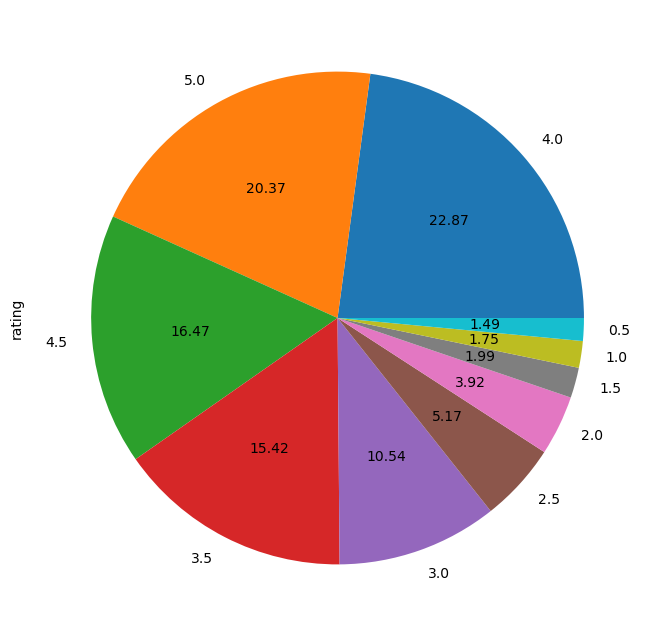

In [10]:
# Establecer el tamaño de la figura
plt.figure(figsize=(10, 8))

# Crear el gráfico de pastel
data['rating'].value_counts().plot(kind='pie', autopct='%.2f')

# Mostrar el gráfico
plt.show()


In [11]:
# genres = ['Action', 'Adventure','Animation',"Children",'Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']


<Figure size 1500x1500 with 0 Axes>

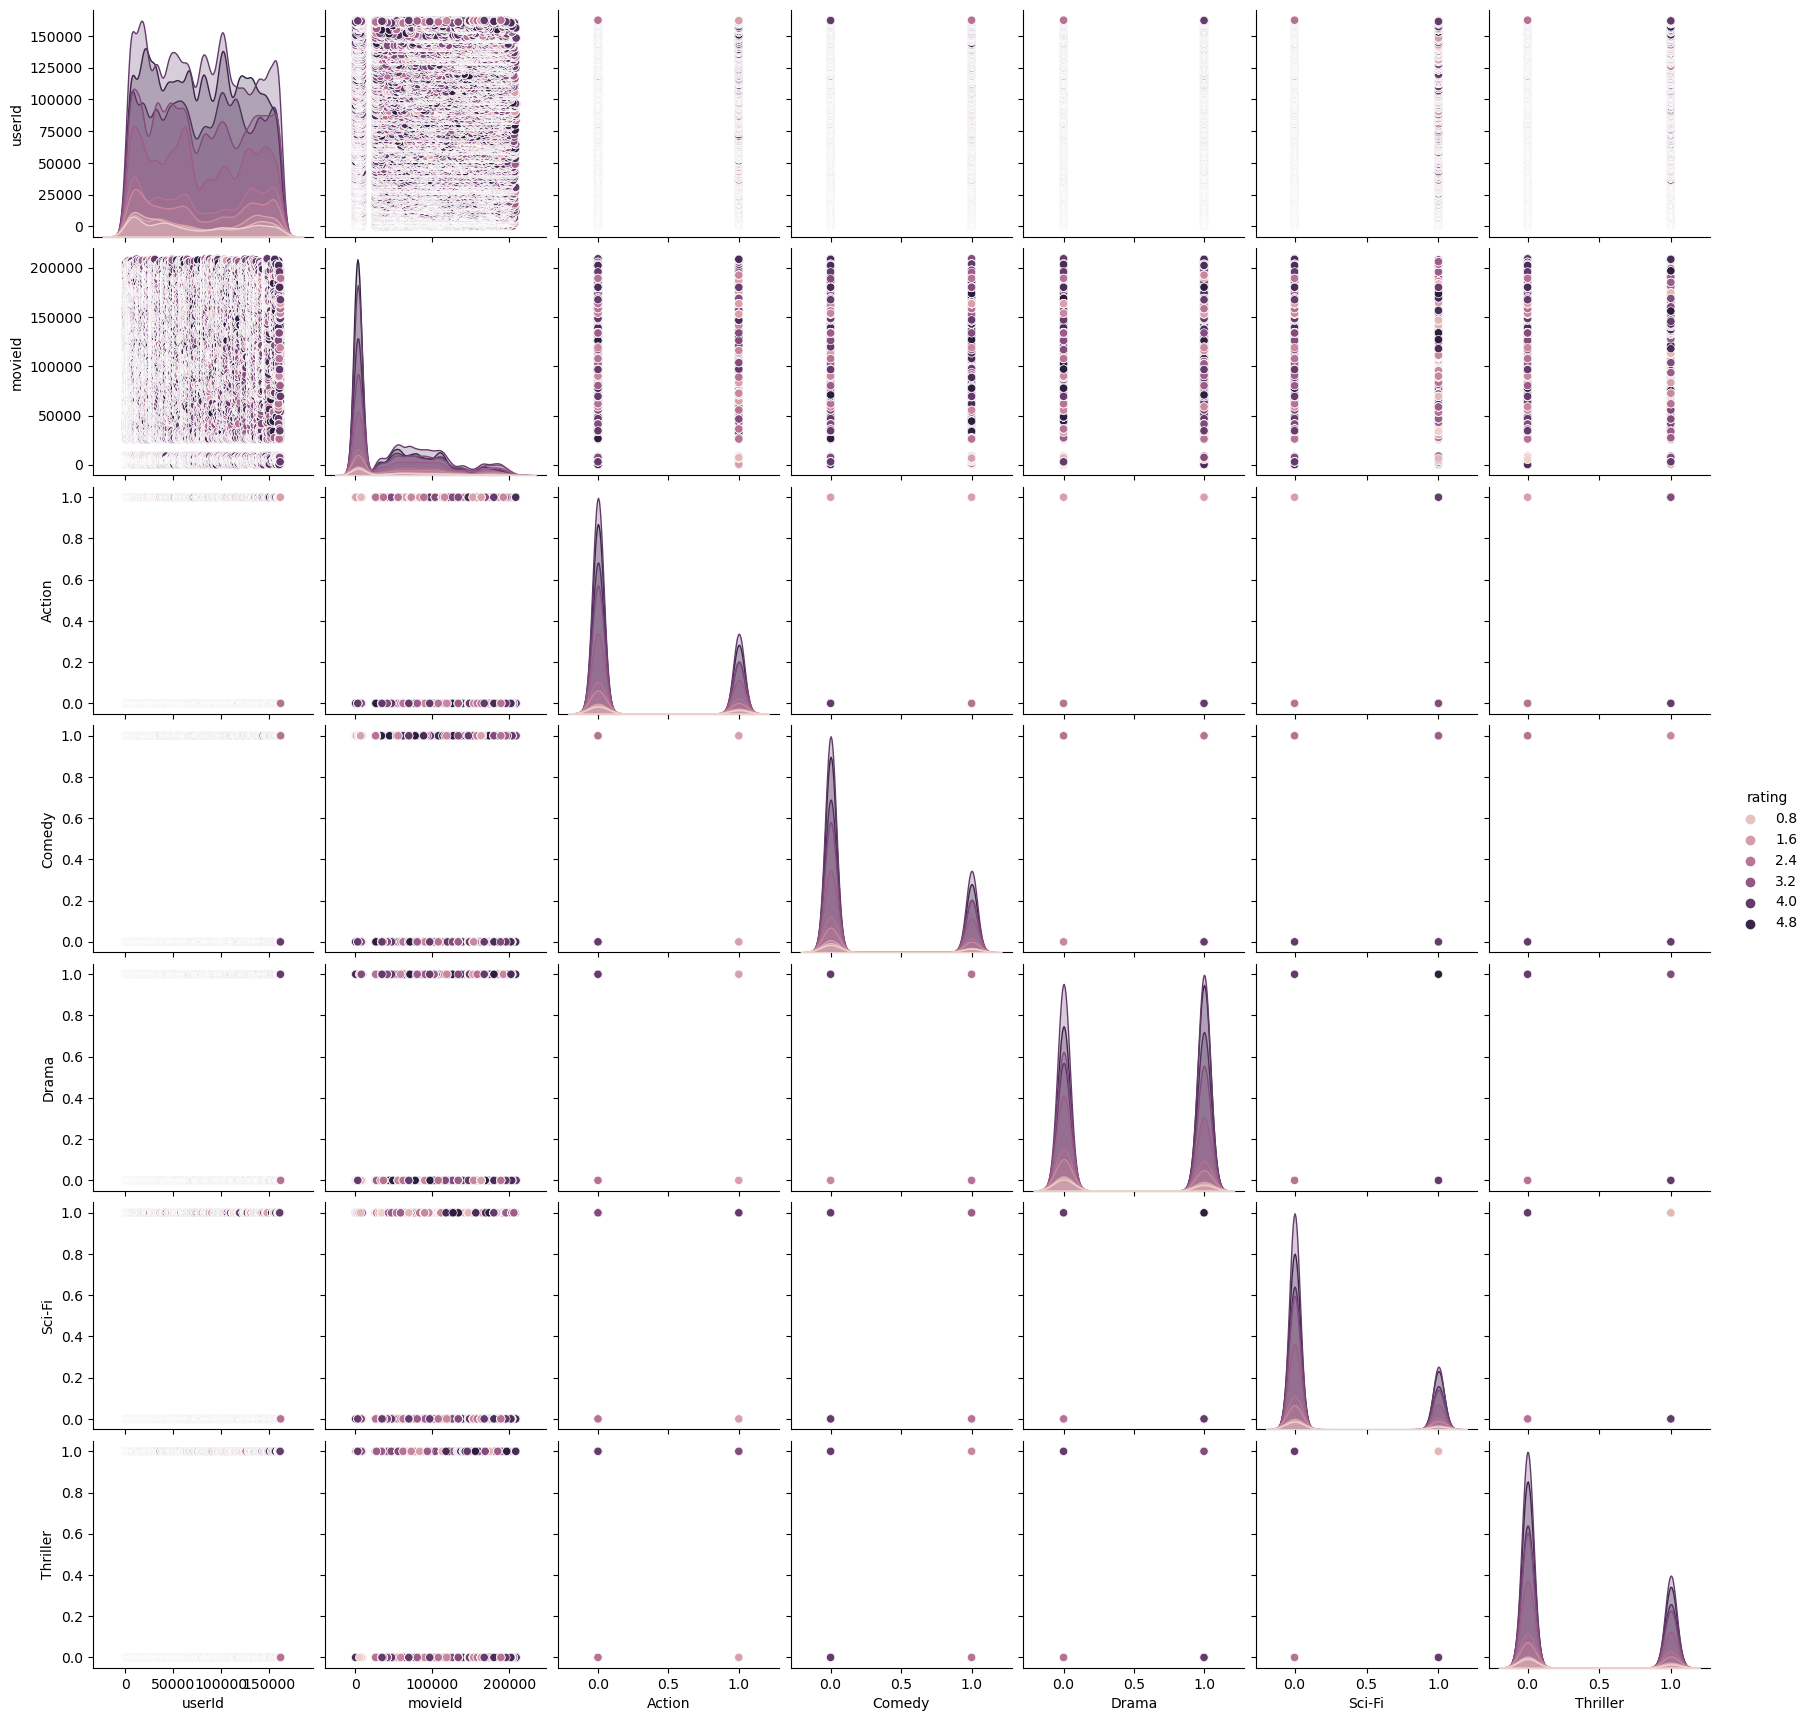

In [12]:
df_minimo = data.copy()
df_minimo = df_minimo[['userId', 'movieId','tag', 'Action','Comedy','Drama','Sci-Fi','Thriller', 'rating']]

plt.figure(figsize=(15,15))
sns.pairplot(data=df_minimo, hue='rating')
plt.show()

In [13]:
# Dividir los datos en características (X) y etiquetas (y)
X = data[['userId', 'movieId','timestamp_scr', 'movie_tags_user', 'timestamp_tags','title', 'genres', 'imdbId','tmdbId', 'tagId','tag_genome', 'relevance']]
['userId', 'movieId','timestamp_scr','timestamp_tags', 'Action', 'Adventure','Animation',"Children",'Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western', 'rating']
y = data['rating']
['userId', 'movieId', 'timestamp_scr', 'movie_tags_user',
       'timestamp_tags', 'title', 'tagId', 'relevance', 'tag_genome',
       '(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western', 'rating']
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

KeyError: "['movie_tags_user', 'genres', 'imdbId', 'tmdbId', 'tagId', 'tag_genome', 'relevance'] not in index"

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Supongamos que tienes tus datos en X (características) e y (calificaciones)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el clasificador SVM con probabilidad habilitada
svm_classifier = SVC(kernel='linear', probability=True)

# Entrenar el modelo SVM
svm_classifier.fit(X_train, y_train)

# Realizar predicciones y obtener probabilidades para las clases
y_pred = svm_classifier.predict(X_test)
probabilidades = svm_classifier.predict_proba(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión: {accuracy}')

# Mostrar el reporte de clasificación
print('Reporte de Clasificación:')
print(classification_report(y_test, y_pred))

# Mostrar las probabilidades para las primeras 10 muestras
print('Probabilidades para las primeras 10 muestras:')
print(probabilidades[:10])

In [ ]:
# Inicializar y entrenar el modelo SVM
model = SVR(C =10, kernel='rbf', gamma='scale')
model.fit(X_train, y_train)

In [ ]:
# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Calcular el error cuadrático medio de las predicciones
mse = mean_squared_error(y_test, predictions)
print('Error Cuadrático Medio:', mse)
print('Predicción:', predictions)

In [ ]:
umbral = 4.0
y_true_binario = (y_test > umbral).astype(int)
y_pred_binario = (predictions > umbral).astype(int)

accuracy = accuracy_score(y_true_binario, y_pred_binario)
print(f'Precisión: {accuracy}')

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy de SVM con C=10 --> {accuracy}')

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, predictions)

In [ ]:
# Codificar el género como un valor numérico
genero_codificado = label_encoders['Género'].transform(['Ciencia Ficción'])

# Crear un DataFrame con las características del usuario para hacer la predicción
nuevas_caracteristicas = pd.DataFrame({
    'UsuarioID': [6],
    'PelículaID': [3],
    'Género': genero_codificado
})

# Realizar la predicción utilizando el modelo SVM
prediccion = model.predict(nuevas_caracteristicas[['UsuarioID', 'PelículaID', 'Género']])

# Imprimir la predicción
print('La predicción de la calificación es:', prediccion[0])